In [21]:
import os

base_dir = '/Users/benoitpatra/Code/twins-recognizer/data/sets'

TRAIN_DIR = os.path.join(base_dir, 'train')
VAL_DIR = os.path.join(base_dir, 'validation')
TEST_DIR = os.path.join(base_dir, 'test')

TARGET_SIZE = 300
BATCH_SIZE = 10
TRAIN_SET_SIZE=600
steps_per_epoch= TRAIN_SET_SIZE // BATCH_SIZE

from keras import backend as K
import tensorflow as tf
import keras as ks
config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



In [22]:
from keras.preprocessing.image import ImageDataGenerator

## Define TRAINING SET
train_datagen =  ImageDataGenerator(rescale=1./255, rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True, fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    target_size=(TARGET_SIZE, TARGET_SIZE), 
                                                    batch_size = BATCH_SIZE, 
                                                    class_mode='binary')

Found 692 images belonging to 2 classes.


In [23]:
## Define VALIDATION SET
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VAL_DIR, 
                                                    target_size=(TARGET_SIZE, TARGET_SIZE), 
                                                    batch_size = BATCH_SIZE, 
                                                    class_mode='binary')

Found 300 images belonging to 2 classes.


In [24]:
import matplotlib.pyplot as plt

def plot_history2(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc = history_dict['acc']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
    plt.title('Taining and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    plt.clf()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    plt.plot(epochs, acc_values, 'bo', label='Training acc.')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc.')
    plt.title('Taining and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [25]:
from keras import layers
from keras import models

def model_dense():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(TARGET_SIZE,TARGET_SIZE, 3)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [26]:
def model_addhoc_convnet():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(TARGET_SIZE,TARGET_SIZE, 3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [27]:
from keras import optimizers

model = model_addhoc_convnet()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 33, 33, 128)       147584    
__________

Epoch 1/30
60/60 [==============================] - 65s 1s/step - loss: 0.7063 - acc: 0.4883 - val_loss: 0.6927 - val_acc: 0.4960
Epoch 2/30
60/60 [==============================] - 62s 1s/step - loss: 0.6946 - acc: 0.4684 - val_loss: 0.6924 - val_acc: 0.5340
Epoch 3/30
60/60 [==============================] - 62s 1s/step - loss: 0.6943 - acc: 0.5016 - val_loss: 0.6916 - val_acc: 0.5120
Epoch 4/30
60/60 [==============================] - 62s 1s/step - loss: 0.6898 - acc: 0.5533 - val_loss: 0.6920 - val_acc: 0.5040
Epoch 5/30
60/60 [==============================] - 62s 1s/step - loss: 0.6938 - acc: 0.5317 - val_loss: 0.6878 - val_acc: 0.6000
Epoch 6/30
60/60 [==============================] - 62s 1s/step - loss: 0.6838 - acc: 0.5401 - val_loss: 0.6941 - val_acc: 0.5160
Epoch 7/30
60/60 [==============================] - 63s 1s/step - loss: 0.6832 - acc: 0.5649 - val_loss: 0.6795 - val_acc: 0.5720
Epoch 8/30
60/60 [==============================] - 62s 1s/step - loss: 0.6855 - acc: 0.54

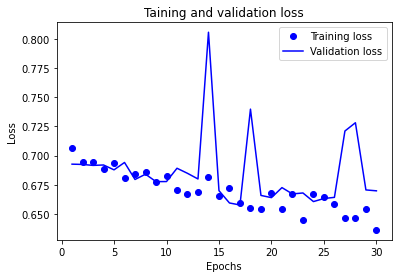

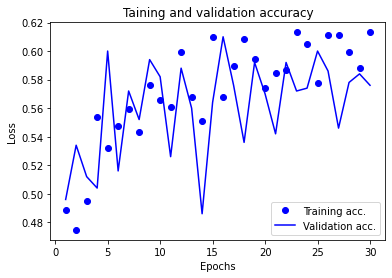

In [28]:
from time import time
t1 = time()
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=30, validation_data=validation_generator, validation_steps=50)
t2 = time()
elapsed = t2 - t1
print('Elapsed time is %f seconds.' % elapsed)
plot_history2(model.history)